# Անշարժ գույքի գների կանխատեսման համակարգի մշակում

## Ներածություն

 Բնակարանային տվյալների հավաքածուն անշարժ գույքի տեղեկատվության կառուցվածքային հավաքածու է, որը նախատեսված է բնակարանային շուկայի վերլուծությանը, գների կանխատեսմանը և մեքենայական ուսուցման հետազոտություններին աջակցելու համար: Տվյալների հավաքածուի յուրաքանչյուր գրառում ներկայացնում է բնակելի անշարժ գույք և ներառում է մանրամասն հատկանիշներ, ինչպիսիք են գտնվելու վայրը, չափը, սենյակների քանակը, շենքի տարիքը, թաղամասի առանձնահատկությունները և շուկայական արժեքը:Անշարժ գույքի շուկան հանդիսանում է տնտեսության ամենաակտիվ և դինամիկ զարգացող ոլորտներից մեկը։ Տների և բնակարանների գների ճշգրիտ կանխատեսումը կարևոր նշանակություն ունի ինչպես գնորդների և վաճառողների, այնպես էլ ներդրողների, բանկերի և շինարարական կազմակերպությունների համար։ Վերջին տարիներին մեքենայական ուսուցման (Machine Learning) մեթոդների կիրառումը հնարավորություն է տալիս ավտոմատ կերպով վերլուծել մեծածավալ տվյալներ և ստանալ բարձր ճշգրտությամբ կանխատեսումներ։

Սույն նախագծի նպատակն է մշակել անշարժ գույքի գների կանխատեսման համակարգ՝ օգտագործելով մեքենայական ուսուցման ալգորիթմներ, իրականացնել տվյալների նախնական մշակում, վերլուծություն, մոդելավորում և արդյունքների գնահատում։

## Նախագծի նպատակը և խնդիրները

## Նպատակ
Մշակել մեքենայական ուսուցման վրա հիմնված համակարգ, որը կկարողանա կանխատեսել անշարժ գույքի գինը՝ ելնելով տան տարբեր հատկանիշներից։

## Հիմնական խնդիրներ
1․Տվյալների բազայի ուսումնասիրություն և նախնական վերլուծություն

2․Տվյալների մաքրում և նախապատրաստում մեքենայական ուսուցման համար

3․Կատեգորիկ տվյալների թվայնացում (encoding)

4․Տվյալների վիզուալ վերլուծություն գրաֆիկների միջոցով

5․Տարբեր մեքենայական ուսուցման մոդելների ուսուցում և համեմատություն

6․Լավագույն մոդելի ընտրություն և գնահատում

# Գրադարանների ներբեռնում և միջավայրի կարգավորում

Այս հատվածում ներբեռնվում են նախագծի համար անհրաժեշտ հիմնական գրադարանները։ Pandas և NumPy գրադարանները օգտագործվում են տվյալների մշակման համար, Matplotlib և Seaborn-ը՝ վիզուալիզացիաների ստեղծման նպատակով, իսկ Scikit-learn-ը՝ տվյալների նախապատրաստման և մեքենայական ուսուցման մոդելների կառուցման համար։

In [14]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

print("Libraries loaded successfully")


Libraries loaded successfully


# Տվյալների ներբեռնում և նախնական ուսումնասիրություն

Այս փուլում տվյալները ներբեռնվում են CSV ֆայլից և իրականացվում է նախնական ուսումնասիրություն։ Դիտարկվում են տվյալների առաջին տողերը, չափսերը և կառուցվածքը՝ հասկանալու համար, թե ինչպիսի սյունակներ և տվյալների տիպեր են առկա։

In [15]:
df = pd.read_csv("/content/Housing.csv")

In [ ]:
# Display first rows
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Dataset shape
df.shape



(545, 13)

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Նկարագրական վիճակագրություն

Նկարագրական վիճակագրությունը թույլ է տալիս ստանալ տվյալների կենտրոնական միտումների և տարածման ընդհանուր պատկերը։ Այս քայլը օգնում է հասկանալ թվային փոփոխականների միջին արժեքները, նվազագույն և առավելագույն սահմանները, ինչպես նաև հնարավոր արտառոց արժեքների առկայությունը։

In [ ]:
# Descriptive statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Բացակայող արժեքների և կրկնօրինակների վերլուծություն

Այս հատվածում վերլուծվում են բացակայող արժեքների առկայությունը և դրանց բաշխումը։ Heatmap վիզուալիզացիան օգնում է արագ հայտնաբերել խնդիր ունեցող սյունակները։ Բացի այդ, ստուգվում և հեռացվում են կրկնօրինակ տողերը՝ տվյալների որակը բարձրացնելու նպատակով։

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


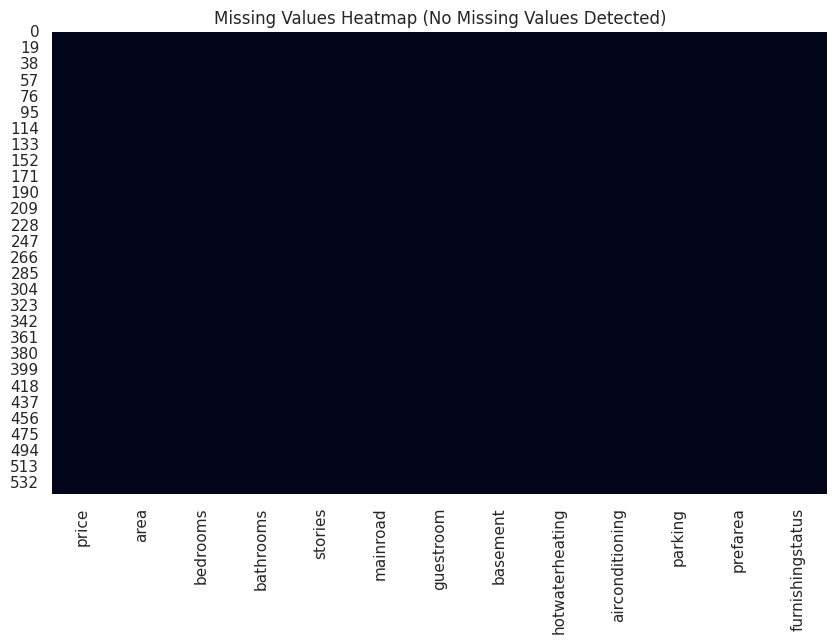

In [18]:
# Missing values visualization
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap (No Missing Values Detected)")
plt.show()


In [ ]:
# Check duplicates
df.duplicated().sum()


np.int64(0)

In [17]:
# Remove duplicates if any
df = df.drop_duplicates()


# Անոմալիաների (Outliers) հայտնաբերում

Boxplot գրաֆիկների միջոցով վերլուծվում են թվային փոփոխականների բաշխումները և հնարավոր արտառոց արժեքները։ Անոմալիաների հայտնաբերումը կարևոր է, քանի որ դրանք կարող են բացասաբար ազդել մոդելի ուսուցման և կանխատեսման ճշգրտության վրա։

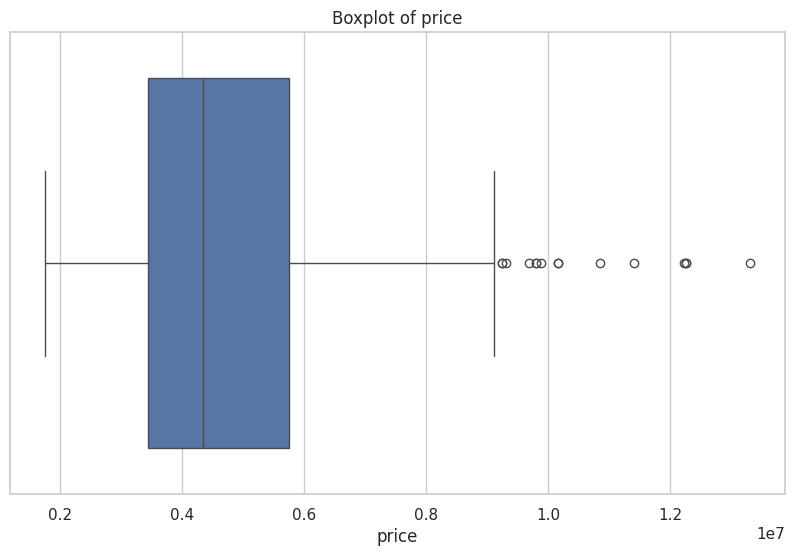

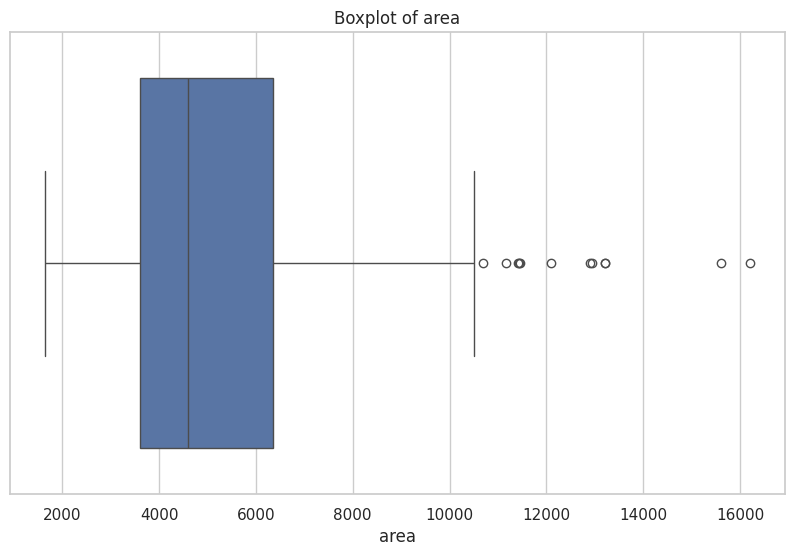

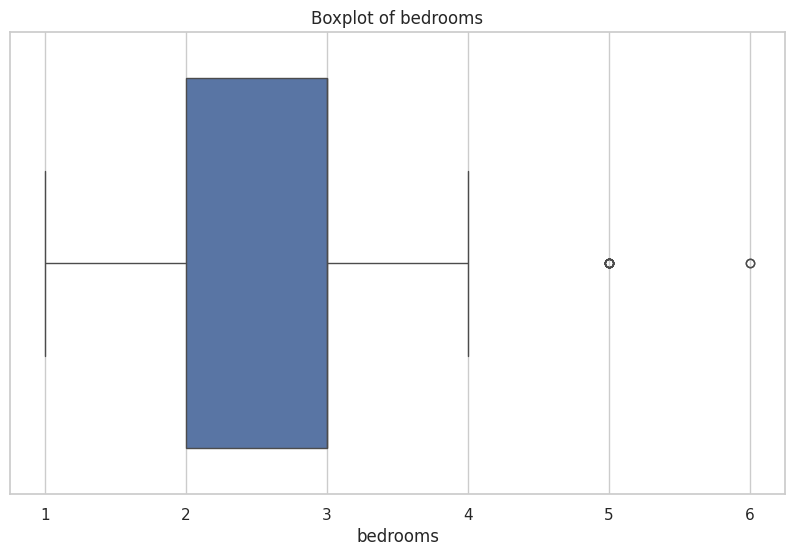

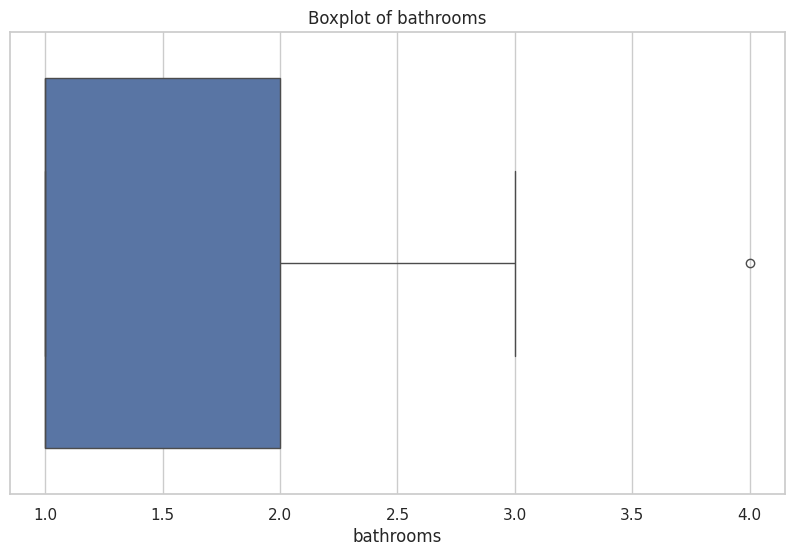

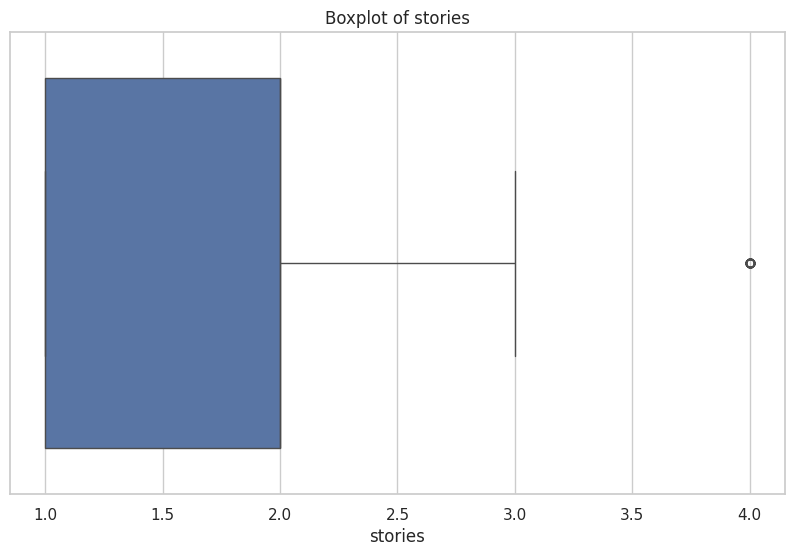

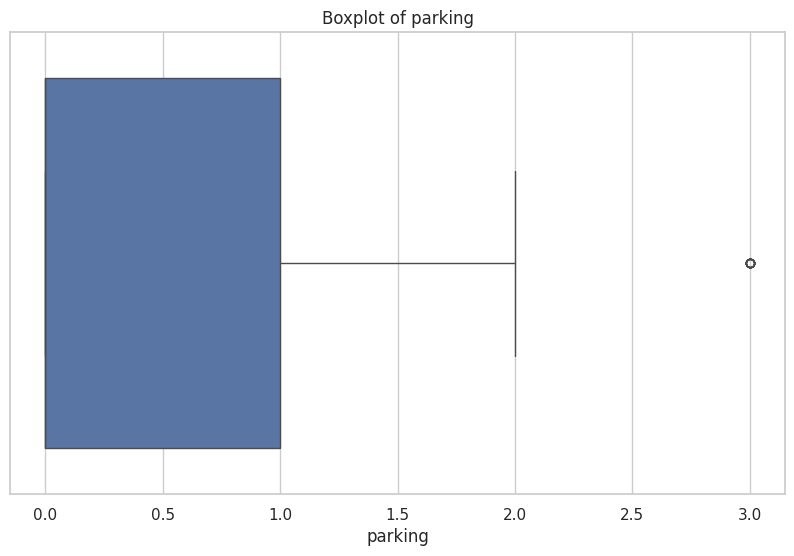

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Տվյալների բաշխման վերլուծություն

Այս հատվածում յուրաքանչյուր թվային փոփոխականի համար կառուցվում են հիստոգրամներ KDE գծերով։ Սա թույլ է տալիս գնահատել տվյալների բաշխման ձևը, ասիմետրիան և նորմալությանը մոտ լինելը, ինչը կարևոր է մոդելավորման փուլում։

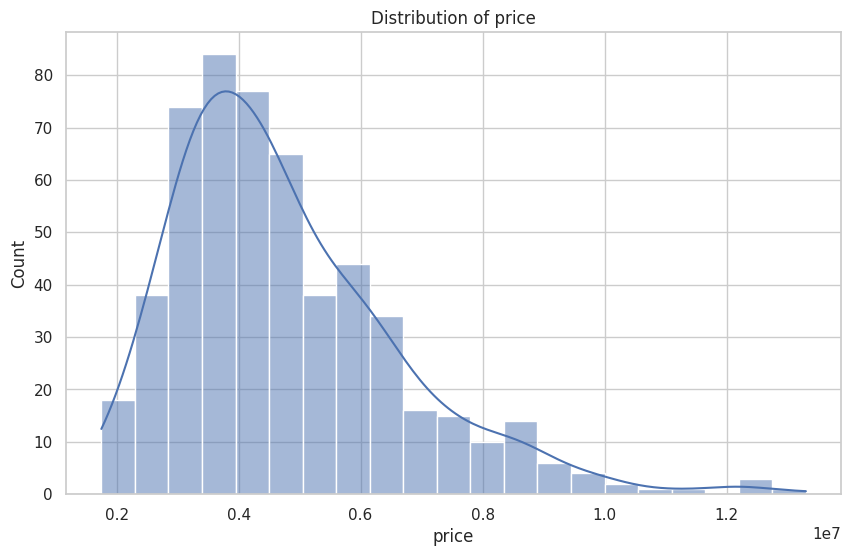

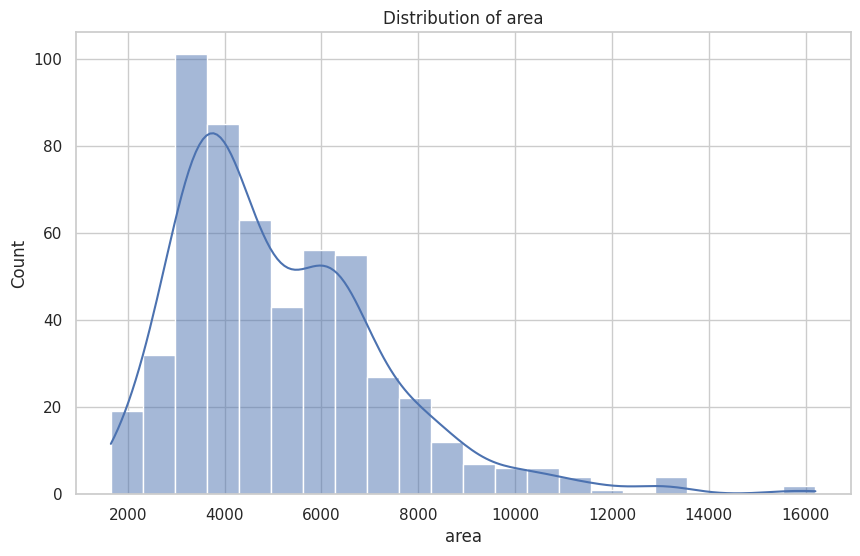

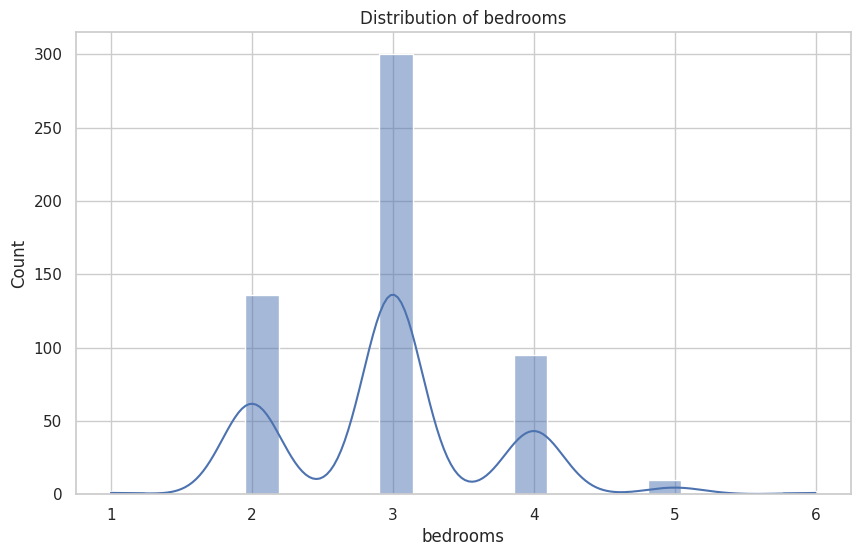

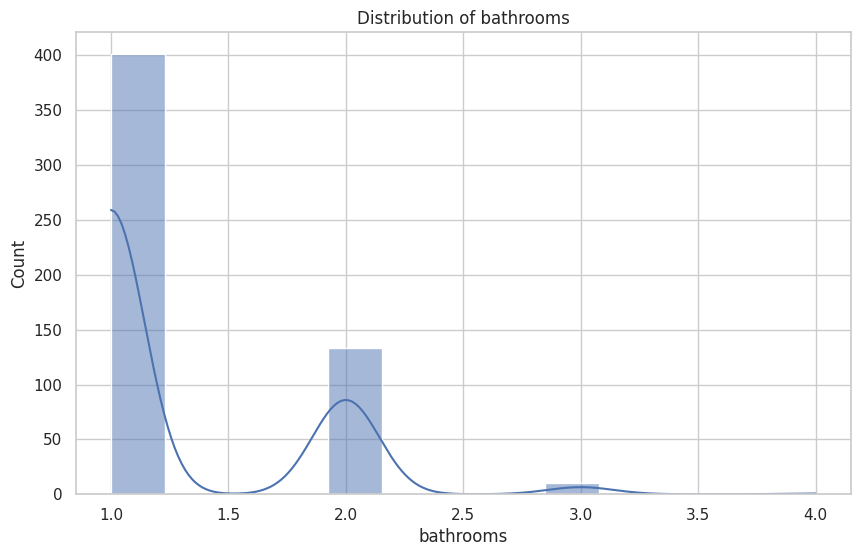

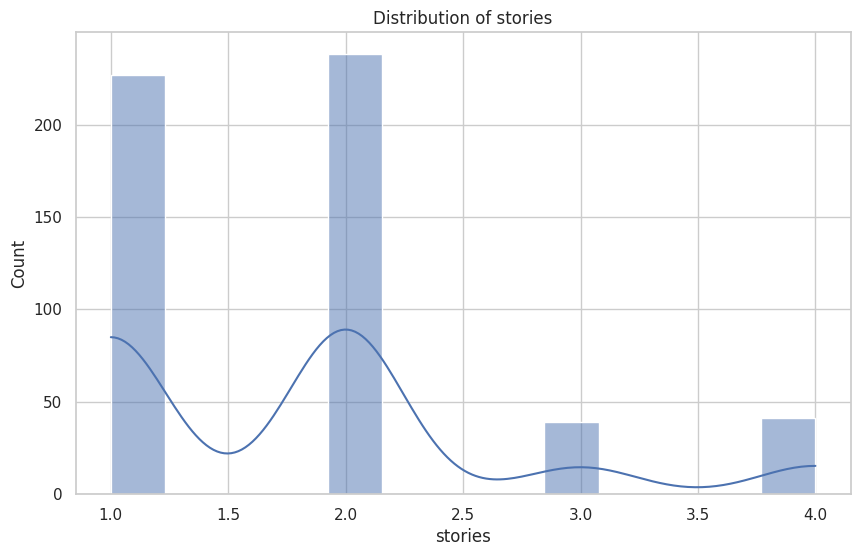

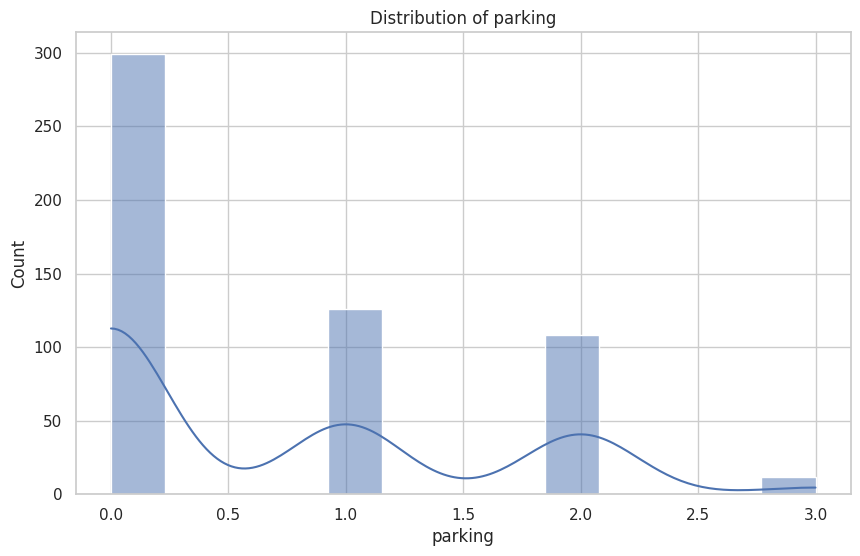

In [ ]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


# Կոռելյացիոն վերլուծություն

Կոռելյացիոն վերլուծությունը իրականացվում է միայն թվային փոփոխականների վրա՝ մաթեմատիկական ճշգրտությունը ապահովելու համար։ Heatmap-ը վիզուալ կերպով ցույց է տալիս փոփոխականների միջև փոխկապակցվածության ուժը։

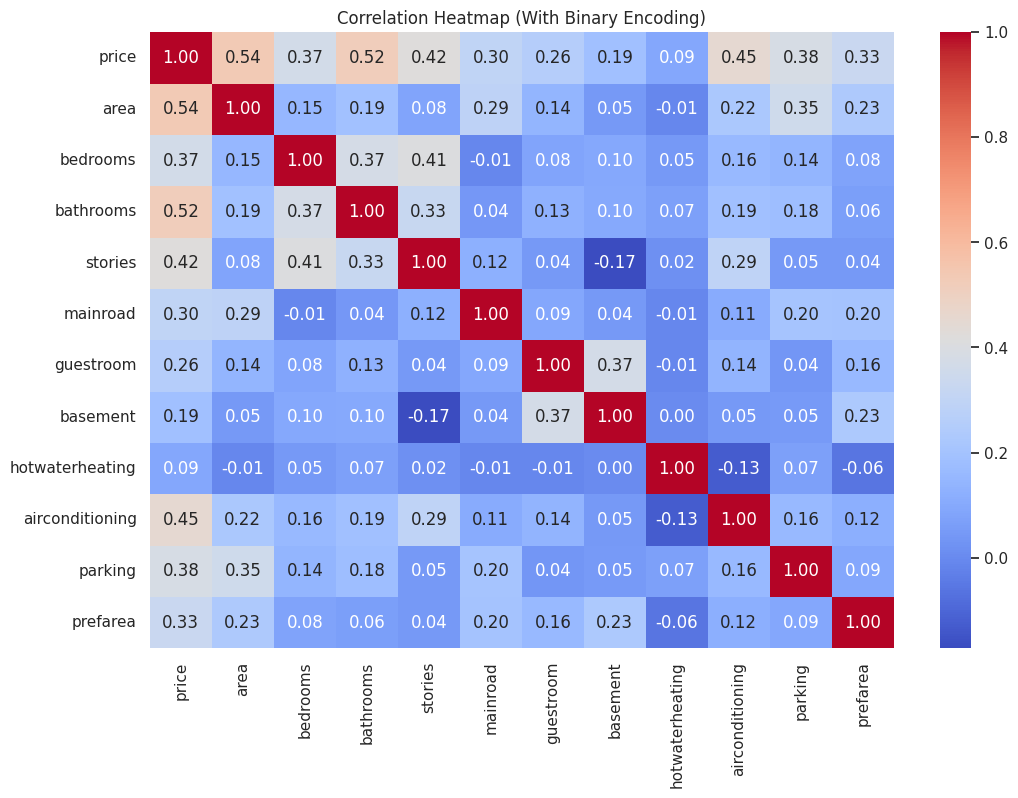

In [ ]:
# Copy dataset
df_corr = df.copy()

# Convert yes/no to 1/0
binary_cols = df_corr.select_dtypes(include="object").columns

for col in binary_cols:
    if set(df_corr[col].unique()) == {"yes", "no"}:
        df_corr[col] = df_corr[col].map({"yes": 1, "no": 0})

# Select numeric columns
corr_matrix = df_corr.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (With Binary Encoding)")
plt.show()

#  Feature Engineering և Encoding

Այս փուլում առանձնացվում է նպատակային փոփոխականը (target) և մուտքային ֆիչերները։ Թվային և կատեգորիկ սյունակները մշակվում են առանձին pipeline-ներով․ թվային տվյալները նորմալիզացվում են, իսկ կատեգորիկները՝ One-Hot Encoding-ի միջոցով։ Այս մոտեցումը ապահովում է տվյալների ճիշտ և ավտոմատ նախապատրաստում մոդելների համար։

In [ ]:
# Target variable
target = "price"

X = df.drop(columns=[target])
y = df[target]

# Identify column types
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns


In [ ]:
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


# Տվյալների բաժանում Train / Test

Տվյալները բաժանվում են ուսուցման(80%) և թեստավորման(20%) մասերի՝ մոդելի ընդհանրացման կարողությունը գնահատելու համար։ Random state-ի օգտագործումը ապահովում է վերարտադրելի արդյունքներ։

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (436, 12)
Test shape: (109, 12)


# Baseline Մոդել – Linear Regression

Linear Regression մոդելը կիրառվում է որպես baseline՝ ավելի բարդ մոդելների արդյունավետությունը համեմատելու համար։ Այն ինտեգրված է preprocessing pipeline-ի մեջ՝ ապահովելով տվյալների ավտոմատ մշակումը և կանխատեսումը։

In [ ]:
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression RMSE: 1324506.9600914398
Linear Regression R2: 0.6529242642153178


# Առաջադեմ մոդել – Random Forest

Random Forest մոդելը կիրառվում է՝ հաշվի առնելով տվյալների ոչ գծային կախվածությունները։ Այն համարվում է հզոր և կայուն ալգորիթմ, որը լավ է աշխատում տարբեր տիպի ֆիչերների հետ և նվազեցնում է overfitting-ի ռիսկը։

In [ ]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=10
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 1398418.4971952415
Random Forest R2: 0.6131077029335603


# Մոդելների համեմատություն (ՎԻԶՈՒԱԼ)

Մոդելների արդյունավետությունը գնահատվում է RMSE և R² չափանիշներով։ Ստացված արդյունքները ներկայացվում են աղյուսակային և գրաֆիկական տեսքով՝ պարզ և տեսանելի համեմատության համար։

In [ ]:
model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

model_results


,Model,RMSE,R2 Score
0,Linear Regression,1.324507e+06,0.652924
1,Random Forest,1.398418e+06,0.613108


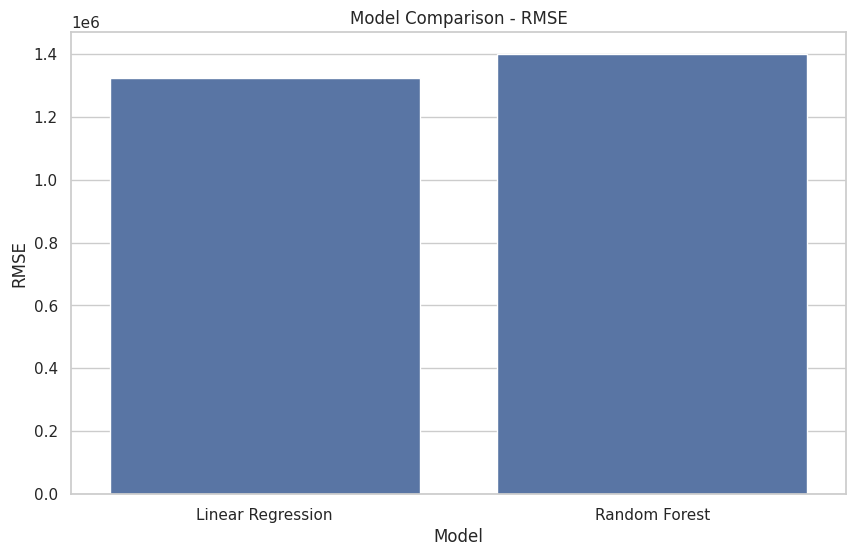

In [ ]:
sns.barplot(x="Model", y="RMSE", data=model_results)
plt.title("Model Comparison - RMSE")
plt.show()


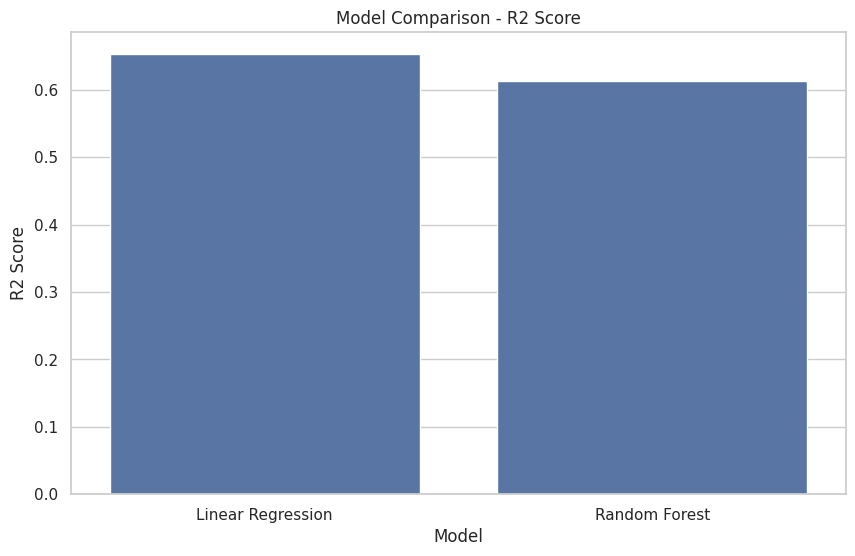

In [ ]:
sns.barplot(x="Model", y="R2 Score", data=model_results)
plt.title("Model Comparison - R2 Score")
plt.show()

# Իրական vs Կանխատեսված արժեքներ

Այս գրաֆիկը համեմատում է իրական և կանխատեսված արժեքները։ Իդեալական դեպքում կետերը պետք է մոտ լինեն անկյունագծին, ինչը ցույց է տալիս մոդելի կանխատեսման ճշգրտությունը։

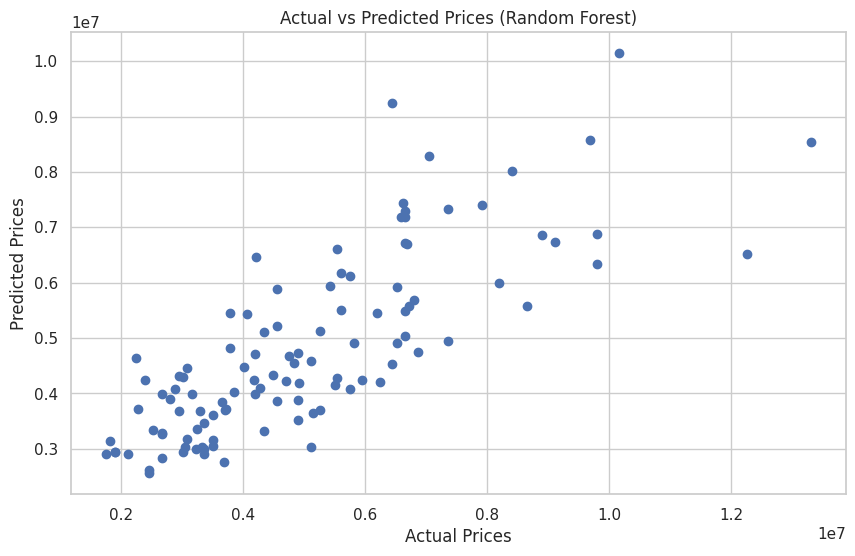

In [ ]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()

# Cross Validation

Cross-validation մեթոդը կիրառվում է մոդելի կայունությունն ու ընդհանրացման կարողությունը գնահատելու համար։ Այն թույլ է տալիս ստանալ ավելի վստահելի արդյունքներ՝ տարբեր տվյալների ենթաբազմությունների վրա։

In [ ]:
cv_scores = cross_val_score(
    rf_model, X, y,
    scoring="r2",
    cv=5
)

print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())


Cross-validation R2 scores: [ -3.00015445  -8.22227992 -19.02892929 -18.69663068 -10.28836033]
Mean CV R2: -11.84727093286162


# House Price Distribution

Այս գրաֆիկը ցույց է տալիս բնակարանների գների բաշխումը։ Այն օգտագործվում է տվյալների ընդհանուր կառուցվածքը հասկանալու համար՝ բացահայտելով ասիմետրիայի (skewness), արտառոց արժեքների (outliers) և արժեքների խտության կենտրոնները։ Գների բաշխման ուսումնասիրությունը կարևոր է, քանի որ այն ազդում է մոդելավորման ընտրության վրա և կարող է հուշել տվյալների տրանսֆորմացիայի անհրաժեշտությունը։

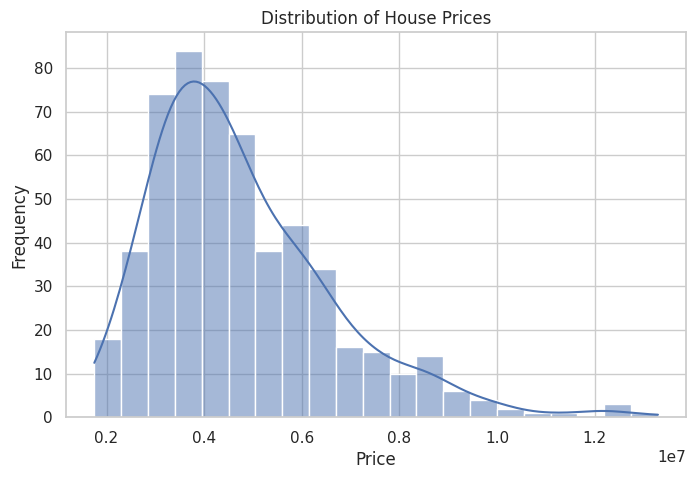

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# Price vs Area Relationship

Այս սքաթեր գրաֆիկը ներկայացնում է տան գնի և մակերեսի միջև կապը։ Այն թույլ է տալիս վիզուալ կերպով գնահատել կախվածության բնույթը՝ գծային կամ ոչ գծային։ Գրաֆիկը ցույց է տալիս, որ մակերեսի մեծացման հետ հիմնականում աճում է նաև գինը, ինչը հաստատում է տվյալ ֆիչերի կարևորությունը մոդելավորման գործընթացում։

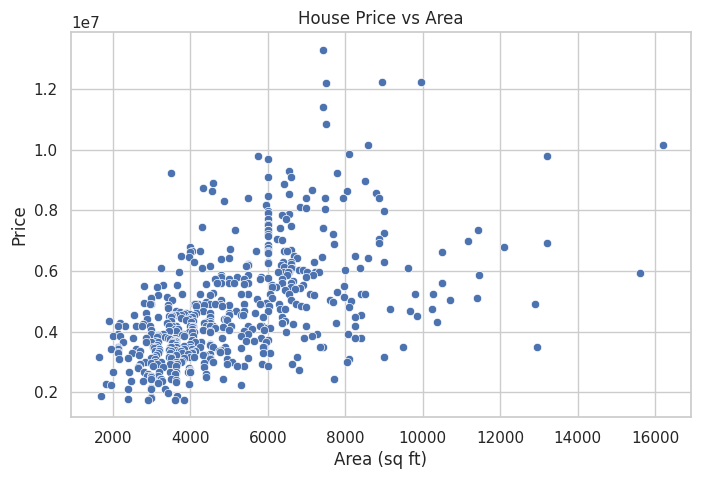

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="area", y="price", data=df)
plt.title("House Price vs Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()


# Price Distribution by Main Road Access

Այս boxplot-ը համեմատում է բնակարանների գների բաշխումը՝ կախված հիմնական ճանապարհին հասանելիությունից։ Այն հնարավորություն է տալիս գնահատել կատեգորիկ փոփոխականի ազդեցությունը target փոփոխականի վրա՝ միաժամանակ տեսնելով միջին արժեքները, քառորդականները և արտառոց արժեքները։

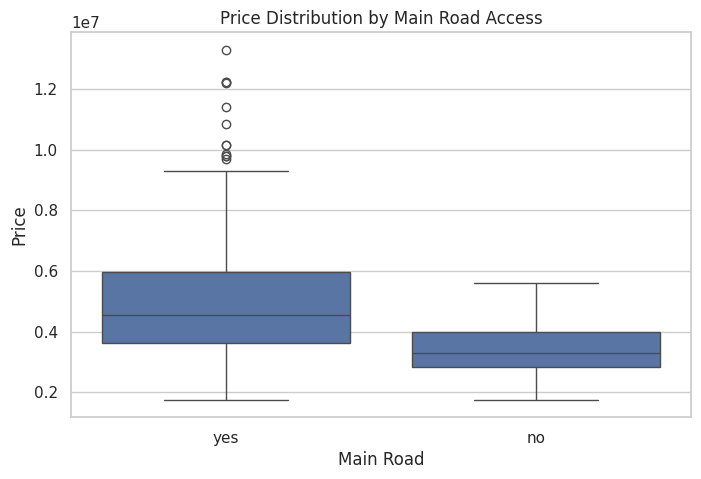

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="mainroad", y="price", data=df)
plt.title("Price Distribution by Main Road Access")
plt.xlabel("Main Road")
plt.ylabel("Price")
plt.show()


# Average Price by Furnishing Status

Այս սյունակագիծ գրաֆիկը ցույց է տալիս բնակարանների միջին գները ըստ կահավորման կարգավիճակի։ Այն օգնում է հասկանալ, թե ինչպես է կահավորվածության մակարդակը ազդում գնի վրա և արդյոք տվյալ փոփոխականը կարևոր է մոդելի համար։

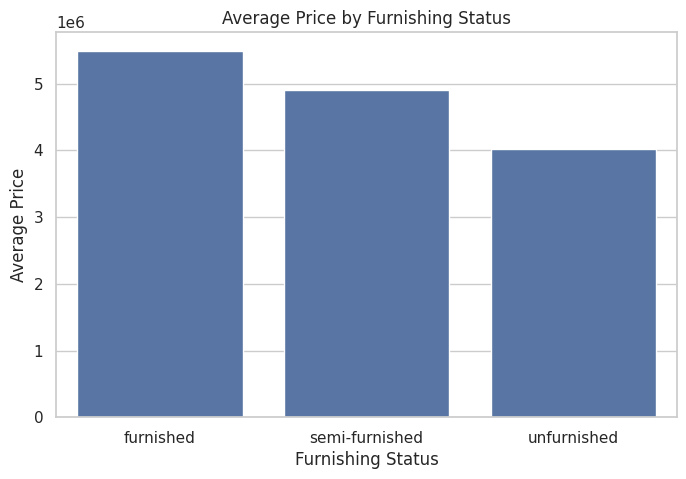

In [ ]:
avg_price = df.groupby("furnishingstatus")["price"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="furnishingstatus", y="price", data=avg_price)
plt.title("Average Price by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Average Price")
plt.show()


# Pairwise Feature Relationships (Pairplot)

Pairplot-ը օգտագործվում է մի քանի թվային փոփոխականների միջև փոխադարձ հարաբերությունները ուսումնասիրելու համար։ Այն թույլ է տալիս միաժամանակ դիտարկել թե՛ բաշխումները, թե՛ զույգային կախվածությունները, ինչն օգտակար է կոռելյացիաների, միտումների և հնարավոր մուլտիկոլլինեարության հայտնաբերման համար։

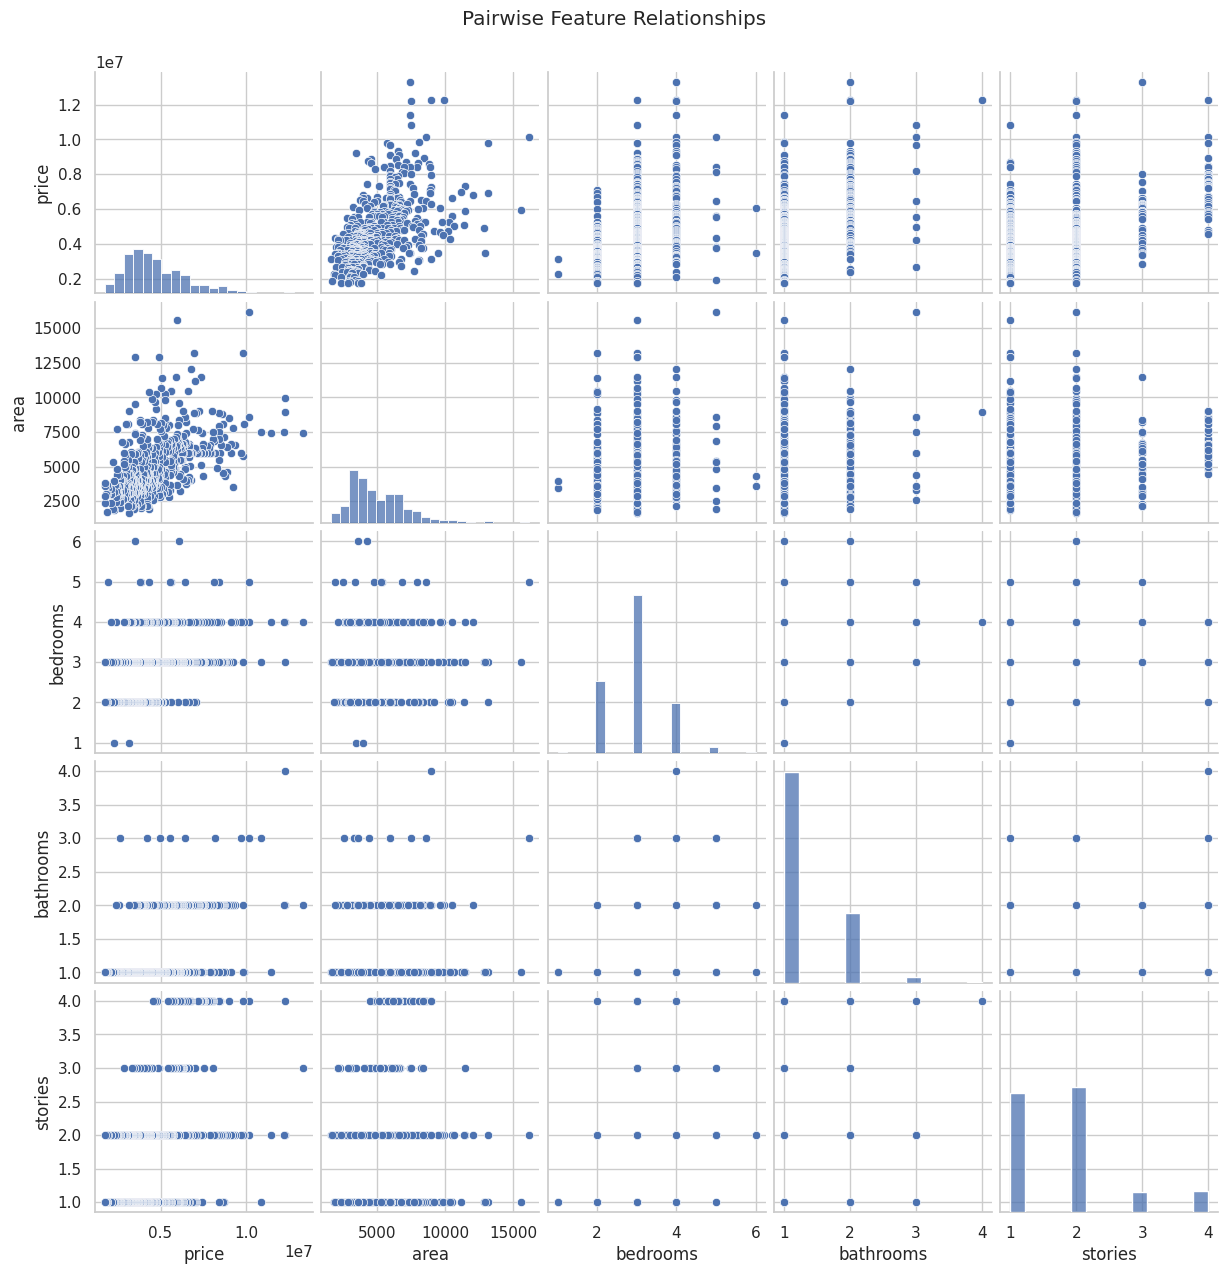

In [ ]:
selected_features = ["price", "area", "bedrooms", "bathrooms", "stories"]

sns.pairplot(df[selected_features])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


# Log-Transformed Price Distribution

Այս գրաֆիկը ներկայացնում է գների լոգարիթմացված բաշխումը։ Քանի որ սկզբնական գների բաշխումը հաճախ ունի աջ կողմի ուժեղ ասիմետրիա, log-transformation-ը կիրառվում է բաշխումը ավելի նորմալ դարձնելու և մոդելի կանխատեսման որակը բարելավելու նպատակով։

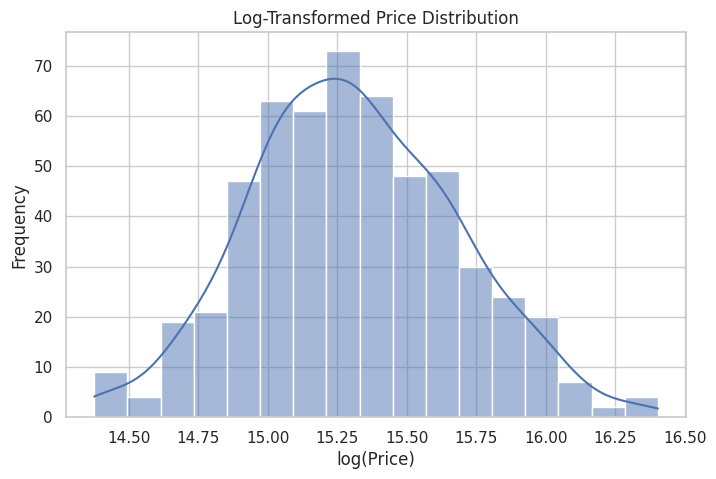

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["price"]), kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")
plt.show()


# Feature Importance (Random Forest Model)

Այս գրաֆիկը ցույց է տալիս Random Forest մոդելի կողմից հաշվարկված ֆիչերների կարևորությունը։ Այն օգնում է բացատրել մոդելի որոշումները՝ պարզելով, թե որ փոփոխականներն ունեն ամենամեծ ազդեցությունը կանխատեսումների վրա։ Այս վերլուծությունը բարձրացնում է մոդելի բացատրելիությունը և վստահելիությունը։

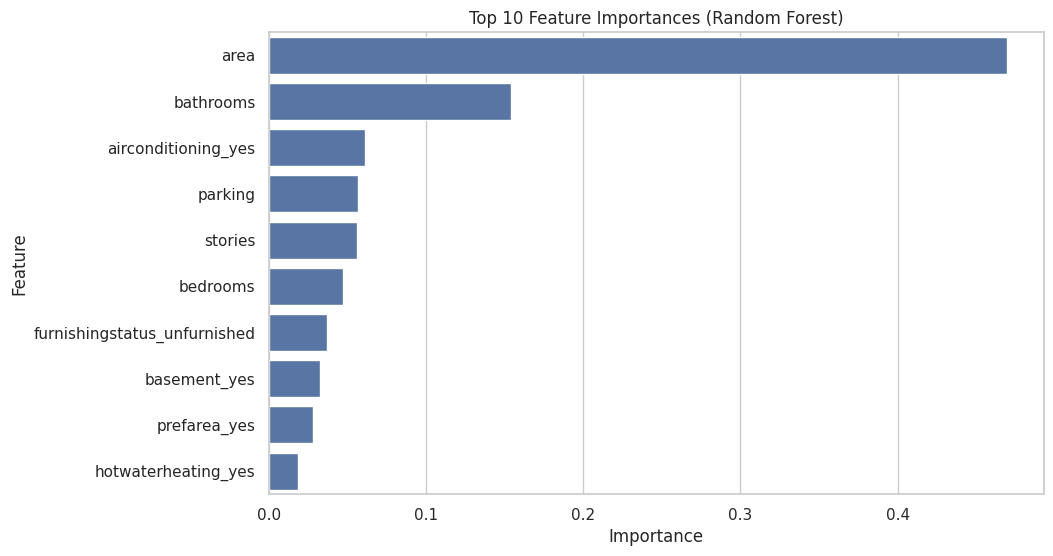

In [ ]:
# Extract trained Random Forest model
rf = rf_model.named_steps["model"]

# Get feature names after preprocessing
ohe = rf_model.named_steps["preprocessor"] \
              .named_transformers_["cat"] \
              .named_steps["encoder"]

cat_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Feature importance
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


# Եզրակացություն

Այս նախագծի շրջանակներում իրականացվել է տվյալների գիտության ամբողջական գործընթաց՝ սկսած տվյալների հավաքագրումից և նախապատրաստումից մինչև վերլուծություն և մեքենայական ուսուցման մոդելների կառուցում։ Նախնական փուլում իրականացվել է տվյալների կառուցվածքի և որակի ուսումնասիրություն, որի արդյունքում բացահայտվել են բացակայող արժեքները, կրկնօրինակները և արտառոց դիտարկումները, և իրականացվել են համապատասխան մաքրման քայլեր։

Տվյալների վիզուալ և վիճակագրական վերլուծությունը հնարավորություն է տվել բացահայտել բնակարանների գների վրա ազդող հիմնական գործոնները։ Մասնավորապես, պարզվել է, որ մակերեսը, ննջասենյակների և լոգասենյակների քանակը, ինչպես նաև տան կահավորվածության կարգավիճակը և հիմնական ճանապարհին հասանելիությունը էական ազդեցություն ունեն գնի ձևավորման վրա։ Կոռելյացիոն և վիզուալ մեթոդների համադրումը նպաստել է կարևոր ֆիչերների ընտրությանը և մոդելավորման ռազմավարության ձևավորմանը։

Մոդելավորման փուլում կիրառվել են ինչպես բազային, այնպես էլ առաջադեմ մեքենայական ուսուցման ալգորիթմներ։ Linear Regression մոդելը ծառայել է որպես համեմատական հիմք, մինչդեռ Random Forest մոդելը ցուցադրել է ավելի բարձր կանխատեսման ճշգրտություն և կայունություն։ Մոդելների արդյունավետությունը գնահատվել է RMSE և R² չափանիշների, ինչպես նաև cross-validation մեթոդի միջոցով, ինչը հաստատել է ընտրված մոդելի լավ ընդհանրացման կարողությունը։

Ընդհանուր առմամբ, իրականացված աշխատանքը ցույց է տվել, որ տվյալների ճիշտ նախապատրաստումը, խորքային վիզուալ վերլուծությունը և մոդելների համեմատական գնահատումը վճռորոշ դեր են խաղում հաջող կանխատեսման համակարգի կառուցման գործում։ Ստացված արդյունքները կարող են կիրառվել անշարժ գույքի շուկայի վերլուծության և գների կանխատեսման իրական խնդիրների լուծման համար, իսկ նախագիծը կարող է ծառայել որպես ամուր հիմք հետագա հետազոտությունների և մոդելի կատարելագործման համար։